In [12]:
from numpy import linspace,trapz,cos,pi,sin
import matplotlib.pyplot as mp

Antes de analisar, deve-se montar as ferramentas que serão usadas

In [13]:
def integral (funcao,lim_sup:float=1,lim_inf:float=0):
    precisao_por_unidade=100
    intervalo=linspace(lim_inf,lim_sup,precisao_por_unidade)
    return trapz(funcao(intervalo),intervalo)

def derivada (funcao,x):
    return (funcao(x+0.0001)-funcao(x))/0.0001

def plotar (funcao1,funcao2,funcao3):
    x=linspace(0,1,100)
    fig, eixos = mp.subplots(layout='constrained')
    eixos.plot (x,tuple(map(funcao1,x)),scalex=0.1,scaley=.01,linewidth=.5,label='ue1')
    eixos.plot (x,tuple(map(funcao2,x)),scalex=0.1,scaley=.01,linewidth=.5,label='ue2')
    eixos.plot (x,tuple(map(funcao3,x)),scalex=0.1,scaley=.01,linewidth=.5,label='u0')
    eixos.grid()
    eixos.legend()
    mp.show()


Agora podemos começar a análise, utilizando uma propriedade representada por uma função rapidamente oscilante

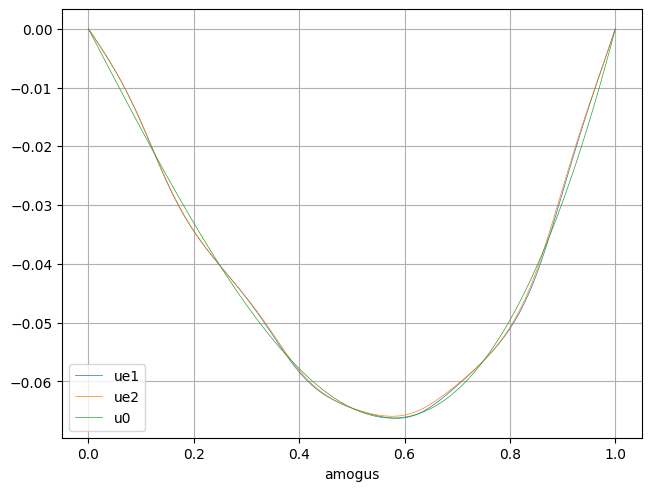

In [14]:
l=0.5
L=1

e=l/L

funcao_a = lambda y: 1+0.25*cos(2*pi*(y/e))
funcao_f = lambda x: x

a_chapeu = (integral(lambda x: (funcao_a(x))**-1))**-1

#fazer u0 ser independente do programador
def u0 (x):
    return (x*(x**2-1))/(6*a_chapeu)

def N1 (y):
    return integral (lambda s: (a_chapeu/funcao_a(s))-1,y)

def u1 (x):
    return (derivada(u0,x))*N1(x/e)

def N2(y):
    tudocte=integral(N1)*a_chapeu
    return integral (lambda s: -N1(s)+tudocte/funcao_a(s),y)

def u2 (x):
    return (funcao_f(x)/a_chapeu)*N2(x/e)

def ue2 (x):
    return u0(x)+e*u1(x)+e*e*u2(x)

def ue1 (x):
    return u0(x)+e*u1(x)

plotar(ue1,ue2,u0)